In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress

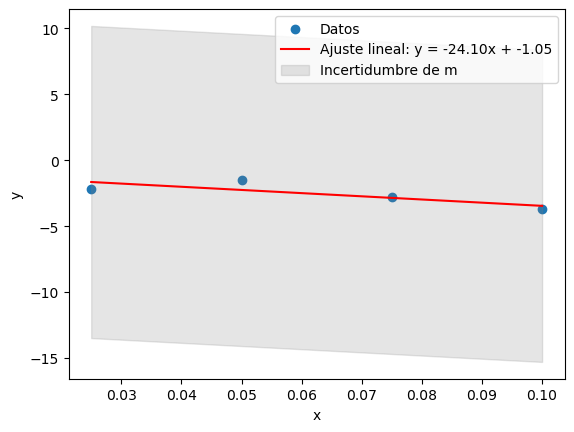

Pendiente (m): -24.10 ± 11.83
Intercepto: -1.05
Coeficiente de correlación (r): -0.82
Valor p: 0.1786


In [40]:
ruta_archivo_csv = "C:\\Users\\ALEJANDRO\\Documents\\APM 2023\\SEMESTRE 6\\LABORATORIO INTERMEDIO\\EXPERIMENTOS\RAYOS X\\DATOS CSV\\act2_abs.csv"
datos = pd.read_csv(ruta_archivo_csv, decimal = ",", sep = ";", encoding="utf-8")
vacio = datos["Vacio"]
Al_002 = datos["Zn_005"]
Al_004 = datos["Zn_0025"]
Al_006 = datos["Zn_0075"]
Al_008 = datos["Zn_01"]
lam = np.sin(np.radians(datos["Ángulo"] + 1.6))*2*(2.014)

x = np.array([0.025,0.05,0.075,0.1])

i = 9
y = np.log(np.array([Al_002[i]/vacio[i], Al_004[i]/vacio[i],Al_006[i]/vacio[i],Al_008[i]/vacio[i]]))

slope, intercept, r_value, p_value, std_err = linregress(x, y)

y_pred = slope * x + intercept

# Grafica los datos y la regresión lineal
plt.scatter(x, y, label='Datos')
plt.plot(x, y_pred, color='red', label=f'Ajuste lineal: y = {slope:.2f}x + {intercept:.2f}')

# Muestra las incertidumbres en la gráfica
plt.fill_between(x, y_pred - std_err, y_pred + std_err, color='gray', alpha=0.2, label='Incertidumbre de m')

# Configura etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Muestra la gráfica
plt.show()

# Imprime los resultados
print(f"Pendiente (m): {slope:.2f} ± {std_err:.2f}")
print(f"Intercepto: {intercept:.2f}")
print(f"Coeficiente de correlación (r): {r_value:.2f}")
print(f"Valor p: {p_value:.4f}")

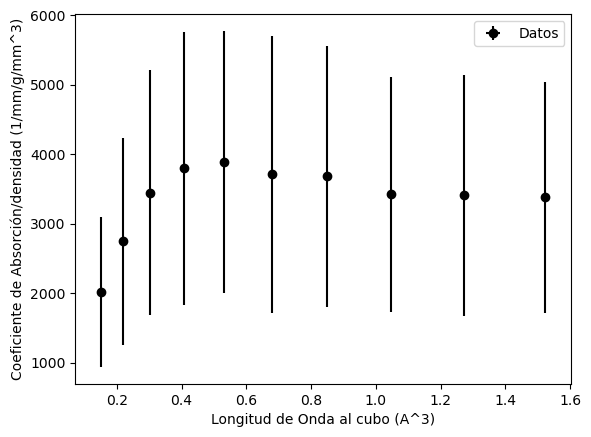

In [45]:
grad6 = 14.4
grad7 = 19.59
grad8 = 24.59
grad9 = 27.09
grad10 = 27.73
grad11 = 26.46
grad12 = 26.25
grad13 = 24.4
grad14 = 24.32
grad15 = 24.10

denZn = 7.13/1000

yerr = np.array([[7.71, 10.62, 12.54, 14.00, 13.46, 14.25, 13.4, 12.05, 12.36, 11.83]])/denZn

y1 = np.array([grad6, grad7,  grad8, grad9, grad10, grad11, grad12, grad13, grad14, grad15])/denZn
lamcu = lam**3

plt.errorbar(lamcu, y1, xerr = 0.01, yerr = yerr, color = "black", fmt='o', label='Datos')
plt.xlabel("Longitud de Onda al cubo (A^3)")
plt.ylabel("Coeficiente de Absorción/densidad (1/mm/g/mm^3)")
plt.legend()
plt.show()